# S3
This is a iPython Notebook document, associated to the S3 figure in the Support Information of the manuscript:
# PALMA, an improved algorithm for the DOSY signal processing
Afef cherni, Émilie chouzenoux, Marc-André Delsuc 

# Signal A

scene.py:76: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x[dtoi(p, N, Dmin, Dmax)] = I


,$\lambda$,Quality reconstruction in $dB$,PDI
0,0.00,5.653801,14.021360
1,0.01,1.059681,18.841140
2,0.02,0.806358,18.932501
3,0.05,0.589224,19.104383
4,0.10,0.476451,19.259437
5,0.20,0.391667,19.423242
6,0.50,0.309949,19.649537
7,1.00,0.265881,19.840430


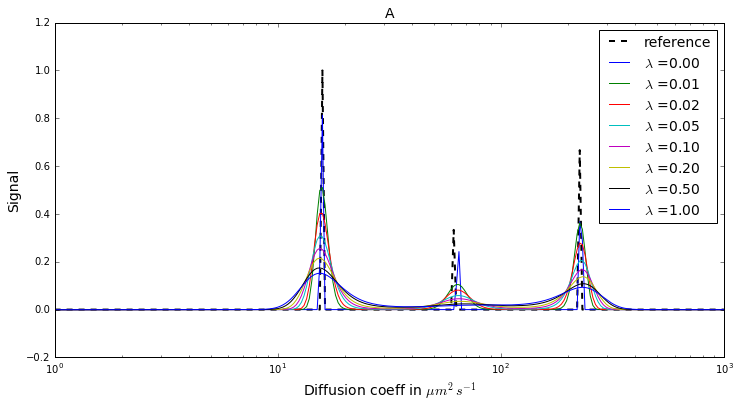

In [1]:
import numpy as np
import scipy.stats
import scipy
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
%matplotlib inline
import Code.scene as scene 
import Code.PALMA as PALMA
import pandas as pd
##############################
#Measurement parameter
##############################
N = 256
M = 64
delta = 2E-3
Delta = 50E-3
Dmin = 1.0
Dmax = 1000.0
D= 16
noise = 0.001 #noise = 0.1%
##############################
# Measurement of signal A
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_exp(D, Delta, invshift=10)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
x = scene.scene_Kazi(N, Dmin, Dmax)
x = x.reshape((N,1))
z = np.dot(K,x) 
sigma = noise*z[0]
np.random.seed(3333)
y = z + sigma*np.random.randn(M,1)
eta = 1.01*np.sqrt(M)*sigma
##############################
#Algorithm parameter
##############################
nbiter = 200000
prec = 1E-14
full_output = False
##############################
#Signal reconstruction
##############################
Qlt = []
PDI = []
LamdaList = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
plt.figure(figsize=(12,6))
plt.semilogx(Lap_axis,np.abs(x), "k--", linewidth = 2, label = "reference")
coeff = 1
for lamda in LamdaList:
    #Reconstruction of the signal
    x_n, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter, lamda, prec, full_output)
    #Plot of recovered signal
    plt.semilogx(Lap_axis, x_n*coeff, "-", linewidth = 1, label = r"$\lambda$ =%.2f" % lamda)
    plt.legend(loc=1, fontsize=14)
    plt.ylabel("Signal", size=14)
    plt.xlabel("Diffusion coeff in $\mu m^2 \, s^{-1}$", size=14)
    plt.ylim(ymin=-0.2,ymax=1.2)
    plt.title("A", fontsize=14)
    error =  np.linalg.norm(x_n-x,2) / np.linalg.norm(x)    
    quality = -20*np.log10(error) 
    Qlt.append(quality)
    #PDI coeff
    pdi = scene.PDI(x_n, N, Dmin, Dmax)
    PDI.append(pdi)
    coeff = 3
tab = pd.DataFrame()
tab["$\lambda$"]= list(LamdaList)
tab["Quality reconstruction in $dB$"] = list(Qlt)
tab["PDI"]= list(PDI)
#plt.savefig('SA1.eps', format='eps', dpi=1000)
tab 